<a href="https://colab.research.google.com/github/tarun1820/Mini_project/blob/main/stocastic_matrix_factorisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from pathlib import Path


# users=pd.read_csv("/content/drive/MyDrive/moviedata/users.csv",sep="\t")
# users.head()
folder_path= "/content/drive/MyDrive/ml100_dataset/"
ratings_df=pd.read_csv(folder_path+"u.data", delimiter='\t',header=None)
ratings_df.columns=["user_id","movie_id","ratings","timestamp"]

movies_df=pd.read_csv(folder_path+"u.item", delimiter='\|',header=None,encoding='latin-1')
movies_df.columns=["movie_id","movie_title" , "release_date","video_release_date","IMDb_URL","unknown","Action","Adventure","Animation",
              "Children's","Comedy", "Crime","Documentary","Drama","Fantasy",
              "Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
              "Thriller","War","Western"]

<ipython-input-2-353a1e8bc2c7>:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_df=pd.read_csv(folder_path+"u.item", delimiter='\|',header=None,encoding='latin-1')


In [3]:
ratings_df.head()
movies_df

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
ratings_df['rating_count'] = ratings_df.groupby('movie_id')['user_id'].transform('count')


In [5]:
movie_ratings_filtered = ratings_df[ratings_df['rating_count'] >= 5]
movie_ratings_filtered

,user_id,movie_id,ratings,timestamp,rating_count
0,196,242,3,881250949,117
1,186,302,3,891717742,297
2,22,377,1,878887116,13
3,244,51,2,880606923,81
4,166,346,1,886397596,126
...,...,...,...,...,...
99995,880,476,3,880175444,160
99996,716,204,5,879795543,350
99997,276,1090,1,874795795,37
99998,13,225,2,882399156,109


In [6]:
ratings_df

,user_id,movie_id,ratings,timestamp,rating_count
0,196,242,3,881250949,117
1,186,302,3,891717742,297
2,22,377,1,878887116,13
3,244,51,2,880606923,81
4,166,346,1,886397596,126
...,...,...,...,...,...
99995,880,476,3,880175444,160
99996,716,204,5,879795543,350
99997,276,1090,1,874795795,37
99998,13,225,2,882399156,109


In [7]:
movie_ratings_filtered.sort_values(by =['rating_count'], ascending=True).head()

,user_id,movie_id,ratings,timestamp,rating_count
19844,279,1108,1,892174273,5
67884,782,1302,3,891500028,5
11491,339,1301,3,891032189,5
61005,845,1592,3,885409493,5
13859,206,314,1,888179948,5


In [8]:
plt_pd = movie_ratings_filtered.groupby('movie_id').size().reset_index(name='rating_count')
plt_pd = plt_pd[plt_pd['rating_count'] >= 5]

In [9]:
plt_pd.sort_values(by =['rating_count'], ascending=True)

,movie_id,rating_count
1272,1397,5
1092,1138,5
1244,1324,5
437,439,5
1247,1333,5
...,...,...
292,294,485
179,181,507
99,100,508
256,258,509


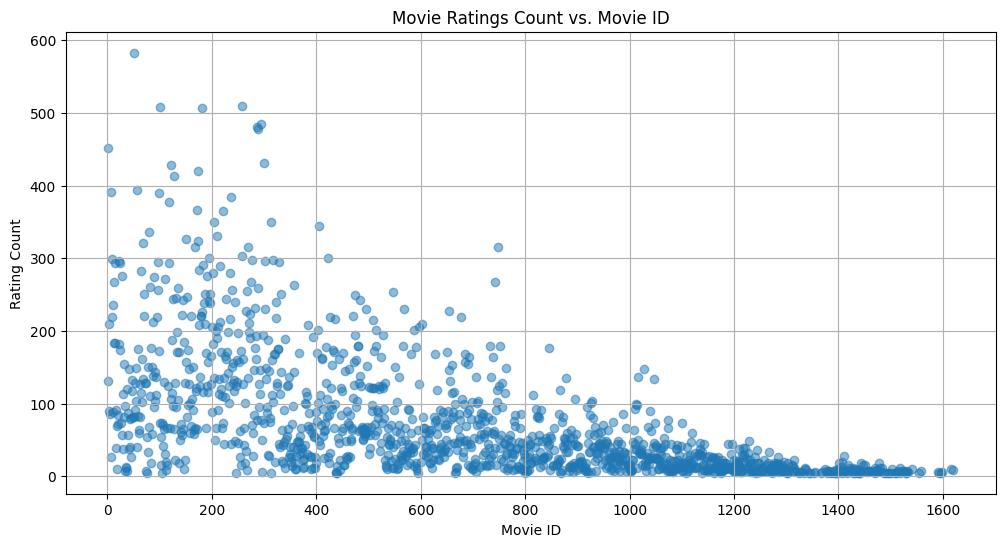

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot movie_id against rating_count
plt.figure(figsize=(12, 6))

plt.scatter(plt_pd['movie_id'], plt_pd['rating_count'], alpha=0.5)
plt.title('Movie Ratings Count vs. Movie ID')
plt.xlabel('Movie ID')
plt.ylabel('Rating Count')
plt.grid(True)

# Show the plot
plt.show()


In [11]:
n_users = ratings_df.user_id.unique().shape[0]
n_items = ratings_df.movie_id.unique().shape[0]

print("no of unique movies and users before filter on movies")
print(n_items,n_users)

n_users = movie_ratings_filtered.user_id.unique().shape[0]
n_items = movie_ratings_filtered.movie_id.unique().shape[0]
print("no of unique movies and users after filter on movies")
print(n_items,n_users)

no of unique movies and users before filter on movies
1682 943
no of unique movies and users after filter on movies
1349 943


333 movies are removed becuse they are rated by less than 5 users

## **helper functions**

> ratings_20_samples -> grouped ratings sampled with filtered users and movies

> caliculate_loss_function -> to caliculte loss function



In [12]:
import numpy as np

# function to merge sample latent featues of maovies and user
def ratings_20_samples():

    # Define a function to get a random sample of 20% of movies rated by a user
    def get_sample(group):
        return group.sample(frac=0.2, random_state=np.random.seed())


    # Group the ratings data by user ID
    user_grouped_ratings = movie_ratings_filtered.groupby('user_id')


    # Apply the function to each group and concatenate the results
    userid_random20percent = user_grouped_ratings.apply(get_sample).reset_index(drop=True)


    # Group the ratings data by movie ID
    movie_grouped_ratings = movie_ratings_filtered.groupby('movie_id')


    # Apply the function to each group and concatenate the results
    movieid_random20percent = movie_grouped_ratings.apply(get_sample).reset_index(drop=True)

    print("size of userid sample",userid_random20percent.shape)
    print("size of movieid sample",movieid_random20percent.shape)

    sample_random20percent = pd.concat([movieid_random20percent,userid_random20percent],join="outer")

    # Remove duplicate rows based on all columns
    sample_random20percent=sample_random20percent.drop_duplicates()

    # Resetting indeses
    sample_random20percent=sample_random20percent.reset_index(drop=True)
    print("size of merged sample",sample_random20percent.shape)

    return sample_random20percent;



def calculate_loss(data, user_matrix, movie_matrix, regularization_strength=0.01):
    # Initialize the loss
    loss = 0.0

    # Calculate the number of data points
    num_data_points = len(data)

    # Calculate the MSE loss
    for _, row in data.iterrows():
        user_id = row['user_id']
        movie_id = row['movie_id']
        rating = row['ratings']

        # Calculate the prediction
        prediction = np.dot(user_matrix[user_id - 1], movie_matrix[movie_id - 1])

        # Calculate the squared error
        squared_error = (rating - prediction) ** 2

        # Add the squared error to the loss
        loss += squared_error

    # Calculate the L2 regularization term for user and movie matrices
    user_regularization = np.sum(np.square(user_matrix)) * regularization_strength
    movie_regularization = np.sum(np.square(movie_matrix)) * regularization_strength

    # Add the regularization terms to the loss
    loss += user_regularization + movie_regularization

    # Calculate the final MSE loss with regularization
    loss /= num_data_points

    return loss


In [13]:
genrt_pre_latent_features().sort_values(by =['timestamp'], ascending=True)

NameError: ignored

In [ ]:
D=genrt_pre_latent_features()

In [ ]:
import numpy as np
import pandas as pd



latent_dim=20
# Set hyperparameters for your SGD algorithm
learning_rate = 0.02
n_epochs = 100
batch_size = 64
regularization=0.001



def matrixfactorisation(data,latent_dim=20,n_epochs=20,learning_rate=0.02,regularization=0.001):
      # Get the number of unique users and movies
      n_users = ratings_df['user_id'].nunique()
      n_movies = ratings_df['movie_id'].nunique()

      # Initialize your user and movie matrices with random values
      user_matrix = np.random.rand(n_users, latent_dim)
      movie_matrix = np.random.rand(n_movies, latent_dim)


      # Iterate over epochs
      for epoch in range(n_epochs):
          # Shuffle your dataset
          data = data.sample(frac=1).reset_index(drop=True)

          # Iterate over batches
          for batch_start in range(0, len(data), batch_size):
              batch = data.iloc[batch_start:batch_start + batch_size]

              # Calculate gradients for this batch
              for _, row in batch.iterrows():
                  user_id = row['user_id']
                  movie_id = row['movie_id']
                  rating = row['ratings']

                  # Calculate the prediction
                  prediction = np.dot(user_matrix[user_id - 1], movie_matrix[movie_id - 1])

                  # Calculate the error
                  error = rating - prediction

                  # Update user and movie matrices using SGD
                  user_matrix[user_id - 1] += learning_rate * (error * movie_matrix[movie_id - 1] - regularization * user_matrix[user_id - 1])
                  movie_matrix[movie_id - 1] += learning_rate * (error * user_matrix[user_id - 1] - regularization * movie_matrix[movie_id - 1])

          # Optionally, you can print the training loss for each epoch
          loss = calculate_loss(data, user_matrix, movie_matrix)
          print(f'Epoch {epoch + 1}, Loss: {loss}')
      return user_matrix,movie_matrix


In [ ]:
matrixfactorisation(D)

**main code**